# COVID-19 Patient Information Dataset

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('Covid Data.csv')
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


1. What is the average age of the patients?

In [4]:
df['AGE'].mean()

41.794102472403026

2. what is the minimum and maximum of the age in the dataset

In [5]:
df['AGE'].min()

0

In [6]:
df['AGE'].max()

121

3.How many unique patients are there in the dataset?

In [7]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

4.What is the distribution of patient types (returned home vs. hospitalized)?

<Axes: xlabel='PATIENT_TYPE', ylabel='count'>

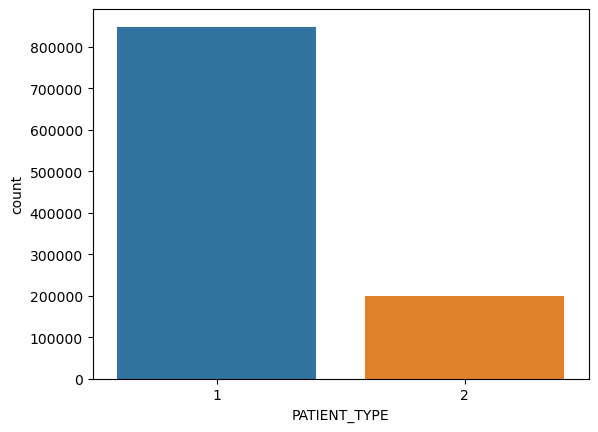

In [8]:
 df['PATIENT_TYPE'].value_counts()
sns.countplot(x='PATIENT_TYPE',data=df)

5.What are the top three pre-existing conditions among the patients?

In [9]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [10]:
selected_columns=df.iloc[:,list(range(9,19))+[6]]
d=selected_columns.eq(1)
disease=d.sum()
disease.nlargest(3)

HIPERTENSION    162729
OBESITY         159816
PNEUMONIA       140038
dtype: int64

6. How many patients have missing values for the "usmr" column?

In [11]:
(df['USMER']==97).sum()

0

In [12]:
(df['USMER']==99).sum()

0

7. Can we visualize the correlation between different pre-existing conditions using a heatmap?


In [13]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

<Axes: >

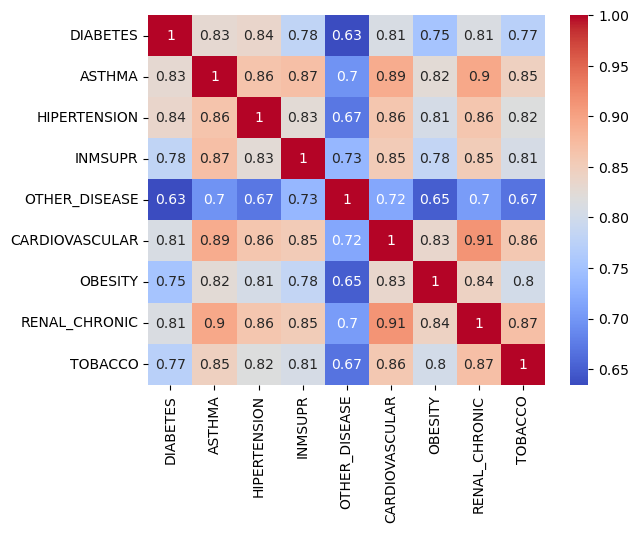

In [14]:
condition_columns = ['DIABETES', 'ASTHMA', 'HIPERTENSION', 'INMSUPR', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
condition_matrix=df[condition_columns].corr()
sns.heatmap(condition_matrix,annot=True, cmap="coolwarm")


8.How does age correlate with the different COVID test findings?

In [15]:
test_finding_columns = ['INTUBED', 'PNEUMONIA', 'DIABETES', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
age_and_test_findings = df[['AGE'] + test_finding_columns]
age_and_test_findings.corr()


,AGE,INTUBED,PNEUMONIA,DIABETES,ASTHMA,HIPERTENSION,OBESITY,RENAL_CHRONIC,TOBACCO
AGE,1.000000,-0.317945,-0.073127,0.004422,0.022715,-0.004964,0.015500,0.020124,0.021263
INTUBED,-0.317945,1.000000,0.079743,-0.009215,-0.023446,-0.007628,-0.020217,-0.019309,-0.022428
PNEUMONIA,-0.073127,0.079743,1.000000,-0.004484,-0.005392,-0.004799,-0.004276,-0.005287,-0.004325
DIABETES,0.004422,-0.009215,-0.004484,1.000000,0.829349,0.835018,0.752739,0.812657,0.771763
ASTHMA,0.022715,-0.023446,-0.005392,0.829349,1.000000,0.864264,0.824631,0.895050,0.845067
HIPERTENSION,-0.004964,-0.007628,-0.004799,0.835018,0.864264,1.000000,0.805127,0.860477,0.816539
OBESITY,0.015500,-0.020217,-0.004276,0.752739,0.824631,0.805127,1.000000,0.842466,0.801834
RENAL_CHRONIC,0.020124,-0.019309,-0.005287,0.812657,0.895050,0.860477,0.842466,1.000000,0.868761
TOBACCO,0.021263,-0.022428,-0.004325,0.771763,0.845067,0.816539,0.801834,0.868761,1.000000


9.What is the distribution of ages among different outcomes (recovered, died)?

Text(0, 0.5, 'frequency')

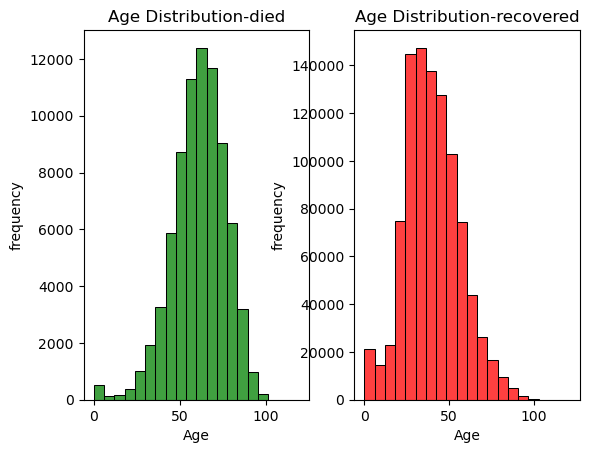

In [16]:
died=df[df['DATE_DIED']!='9999-99-99']
recovered=df[df['DATE_DIED']=='9999-99-99']
fig,axes=plt.subplots(1,2)
sns.histplot(died['AGE'],bins=20,color='g',ax=axes[0])
axes[0].set_title('Age Distribution-died')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('frequency')

sns.histplot(recovered['AGE'],bins=20,color='r',ax=axes[1])
axes[1].set_title('Age Distribution-recovered')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('frequency')

10.Can we create a bar chart to show the count of patients in each medical unit?

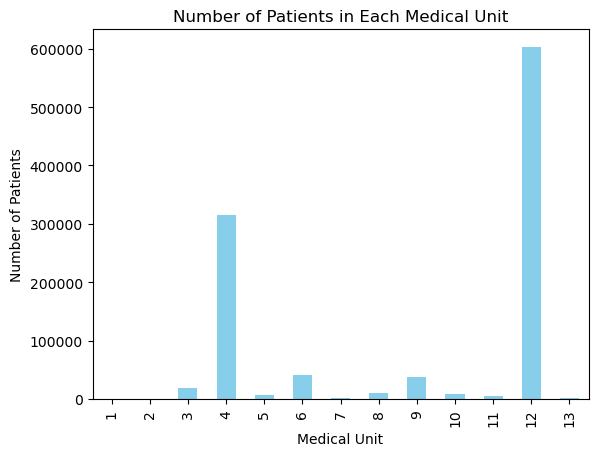

In [20]:
import matplotlib.pyplot as plt
medical_unit_counts = df['MEDICAL_UNIT'].value_counts().sort_index()
medical_unit_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Medical Unit')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Medical Unit')
plt.show()


11. How does the distribution of ages vary between male and female patients?


<Axes: xlabel='AGE', ylabel='Density'>

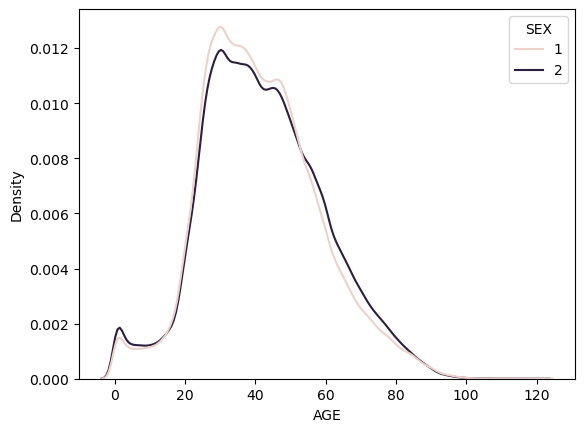

In [21]:
sns.kdeplot(x='AGE',data=df,hue='SEX')

12.Can we visualize the precentage of smokers among th patients?

In [22]:
def smokers(x):
    if x == 1:
        return 'True'
    else:
        return 'False'


In [23]:
df['New']=df['TOBACCO'].apply(smokers)

([<matplotlib.patches.Wedge at 0x20b32247880>,
 [Text(-1.065038740770334, 0.2751226647485479, 'False'),
  Text(1.065038753649754, -0.27512261489048606, 'True')],
 [Text(-0.5809302222383639, 0.1500669080446625, '92.0%'),
  Text(0.5809302292635021, -0.15006688084935602, '8.0%')])

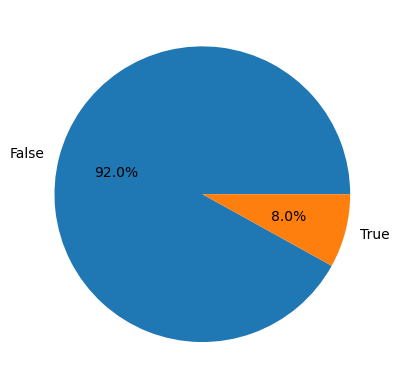

In [24]:
smoker_counts = df['New'].value_counts()
plt.pie(smoker_counts,labels=smoker_counts.index,autopct='%1.1f%%')

13. What is the average age of patients with and without diabetes?


In [25]:
def diabetes(x):
    if x == 1:
        return 'True'
    else:
        return 'False'


In [26]:
df['Patient']=df['DIABETES'].apply(diabetes)

In [27]:
df.groupby('Patient')['AGE'].mean()

Patient
False    39.741129
True     56.964221
Name: AGE, dtype: float64

14.How does the distribution of ages differ between ICU-admitted and non-ICU-admitted patients?

In [28]:
icu=df['ICU']

In [29]:
icu

0          97
1          97
2           2
3          97
4          97
           ..
1048570    97
1048571     2
1048572    97
1048573    97
1048574    97
Name: ICU, Length: 1048575, dtype: int64

In [30]:
mask = (df['ICU'] == 97) | (df['ICU'] == 99)
df.drop(df[mask].index,inplace=True)

In [31]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Outcomes,New,Patient
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,3,2,False,False,True
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,3,2,False,False,False
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,3,2,False,False,True
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,3,2,False,False,False
11,2,1,2,2,9999-99-99,2,2,24,97,2,...,2,2,2,2,2,3,2,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048553,2,13,1,2,9999-99-99,2,1,61,2,1,...,2,2,2,2,2,7,2,False,False,True
1048554,2,13,1,2,9999-99-99,2,1,63,2,2,...,2,2,1,2,2,7,2,False,False,False
1048567,1,13,1,2,9999-99-99,2,2,23,2,1,...,2,2,1,2,2,7,2,False,False,True
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,7,2,False,False,True


<Axes: xlabel='ICU', ylabel='AGE'>

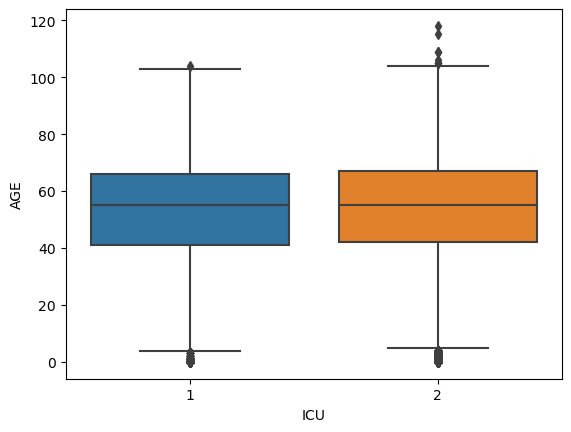

In [32]:
sns.boxplot(x='ICU', y='AGE', data=df)

15. Can we visualize the trend of COVID cases over time (if time information is available)?


In [33]:
df['DATE_DIED']= pd.to_datetime(df['DATE_DIED'],errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_8892\462176567.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_DIED']= pd.to_datetime(df['DATE_DIED'],errors='coerce')


In [34]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Outcomes,New,Patient
2,2,1,2,2,2020-09-06,1,2,55,97,1,...,2,2,2,2,2,3,2,False,False,True
5,2,1,1,2,NaT,2,1,40,2,2,...,2,2,2,2,2,3,2,False,False,False
8,2,1,1,2,NaT,2,2,37,2,1,...,2,2,1,2,2,3,2,False,False,True
9,2,1,1,2,NaT,2,2,25,2,2,...,2,2,2,2,2,3,2,False,False,False
11,2,1,2,2,NaT,2,2,24,97,2,...,2,2,2,2,2,3,2,False,False,False


In [35]:
date=df.groupby('DATE_DIED').size()

<Axes: xlabel='DATE_DIED'>

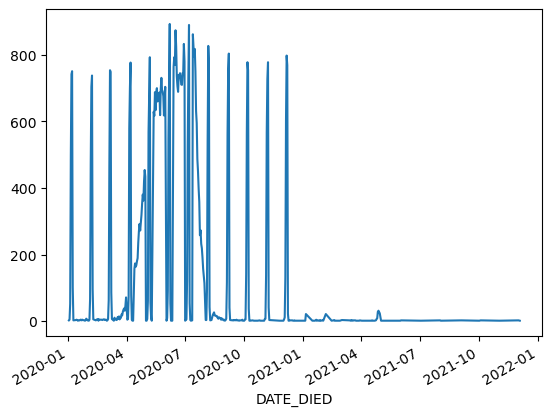

In [36]:
date.plot(kind='line')

16. there a difference in age distribution between pregnant and non-pregnant patients?


<Axes: xlabel='PREGNANT', ylabel='AGE'>

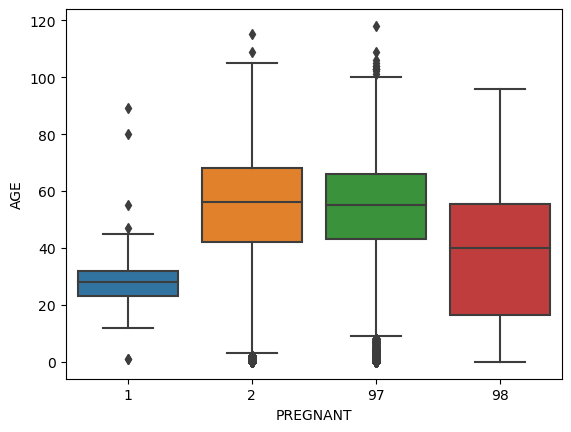

In [37]:
sns.boxplot(x='PREGNANT', y='AGE', data=df)

17.How does the distribution of ages vary between different outcomes (recovered, died) for diabetic patients?

<Axes: xlabel='DIABETES', ylabel='AGE'>

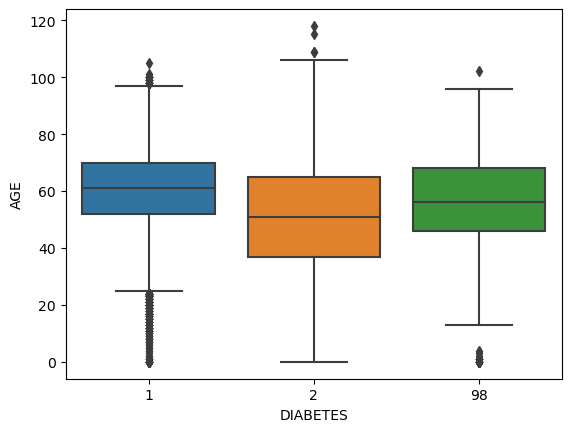

In [38]:
sns.boxplot(x='DIABETES', y='AGE', data=df)